In [1419]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Chcemy przewidzieć cenę za m2
## Interesują nas mieszkania:
### - pokoje: maksymalnie 4
### - metraż: poniżej 80m2
### - cena: poniżej 850 tys.

In [1420]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [1421]:
df['price_m2'] = round(df['price'] / df['meters'])

In [1422]:
df = df[df['meters'] < 80][df['rooms'] < 5][df['price'] < 850000]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [1423]:
df.drop('price', axis=1, inplace=True)

# Struktura danych

In [1424]:
df.head()

,meters,rooms,dealer,district,price_m2
0,61.8,4,Ofertaprywatna,LSM,5971.0
1,79.0,3,PółnocNieruchomościFranczyza,LSM,6190.0
2,60.0,3,PrestigeBroker,Węglin,6250.0
3,58.5,2,HomeBrokerS.A.,Ponikwoda,6650.0
4,56.0,2,HomeBrokerS.A.,Czuby,6777.0


In [1425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2694
Data columns (total 5 columns):
meters      2118 non-null float64
rooms       2118 non-null int64
dealer      2053 non-null object
district    2118 non-null object
price_m2    2118 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 99.3+ KB


In [1426]:
df.dealer.fillna("EMPTY", inplace=True)

In [1427]:
len(df[df.dealer == "EMPTY"])

65

In [1428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118 entries, 0 to 2694
Data columns (total 5 columns):
meters      2118 non-null float64
rooms       2118 non-null int64
dealer      2118 non-null object
district    2118 non-null object
price_m2    2118 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 99.3+ KB


In [1429]:
df['dealer'].value_counts()

3KLUCZEs.c.                                      276
CLIVUSNieruchomości                              199
FRANCZEWSKANieruchomościs.c.                     137
4tepiętro                                        130
Arena                                            103
                                                ... 
Ofertapośrednika                                   1
KompleksowaObsługaRynkuNieruchomościAnnaDziok      1
NieruchomościVERA                                  1
LUKsp.zo.o.SKA                                     1
AgencjaNieruchomościRolmex-PlusSp.zo.o.            1
Name: dealer, Length: 86, dtype: int64

In [1430]:
len(df['dealer'].value_counts())

86

In [1431]:
df['district'].value_counts()

Węglinek           285
Czuby              266
Wrotków            259
Śródmieście        157
Bronowice          143
Felin              139
LSM                122
Dziesiąta          115
lubelskie           69
Centrum             61
Sławin              57
Kośminek            55
Czechów             54
Wieniawa            54
Kalinowszczyzna     53
Ponikwoda           30
Zana                22
Górny               20
Dolny               20
Tatary              18
Sławinek            17
Węglin              17
Szerokie            16
Bazylianówka        14
Botanik             13
Konstantynów        12
Poręba               6
Miasto               5
Warszawska           5
Zadębie              3
Jezuickie            3
Czwartek             3
Konopnickiej         3
Choiny               1
Abramowice           1
Name: district, dtype: int64

In [1432]:
len(df['district'].value_counts())

35

In [1433]:
df.describe()

,meters,rooms,price_m2
count,2118.000000,2118.000000,2118.000000
mean,53.140916,2.565628,6114.754485
std,13.175911,0.777086,1068.696410
min,14.500000,1.000000,1389.000000
25%,45.187500,2.000000,5500.000000
50%,53.300000,3.000000,5971.000000
75%,62.790000,3.000000,6500.000000
max,79.950000,4.000000,12996.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f613bad1390>,
      dtype=object)

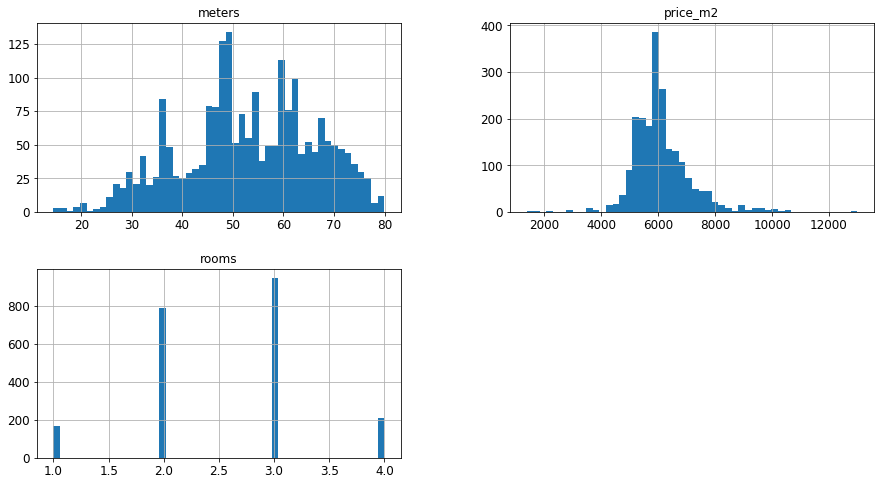

In [1434]:
df.hist(bins=50, figsize=(15, 8))

# Zbiór testowy

In [1435]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

### Atrybuty kategorii

In [1436]:
df['meters_cat'] = np.ceil(df['meters'] / 3.5)
df['meters_cat'].where(df['meters_cat'] > 8, 8.0, inplace=True)
df['meters_cat'].where(df['meters_cat'] < 22, 22.0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f613b958860>,
      dtype=object)

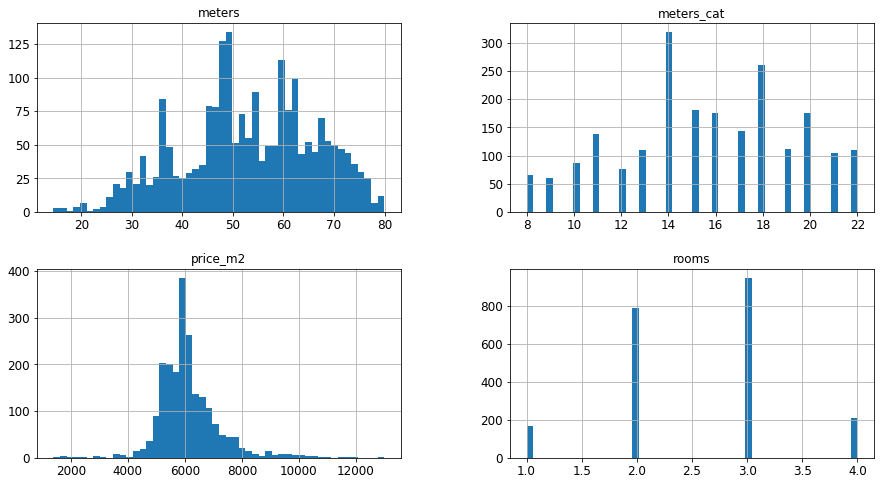

In [1437]:
df.hist(bins=50, figsize=(15, 8))

In [1438]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["meters_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """
/home/adsum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [1439]:
df['meters_cat'].value_counts() / len(strat_test_set)

14.0    0.752358
18.0    0.615566
15.0    0.424528
20.0    0.415094
16.0    0.415094
17.0    0.337264
11.0    0.327830
19.0    0.264151
22.0    0.259434
13.0    0.257075
21.0    0.245283
10.0    0.205189
12.0    0.179245
8.0     0.153302
9.0     0.143868
Name: meters_cat, dtype: float64

In [1440]:
df['meters_cat'].value_counts() / len(df)

14.0    0.150614
18.0    0.123229
15.0    0.084986
20.0    0.083097
16.0    0.083097
17.0    0.067517
11.0    0.065628
19.0    0.052880
22.0    0.051936
13.0    0.051464
21.0    0.049103
10.0    0.041076
12.0    0.035883
8.0     0.030689
9.0     0.028801
Name: meters_cat, dtype: float64

In [1441]:
def income_cat_proportions(data):
    return data["meters_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Łącznie": income_cat_proportions(df),
    "L. warstwowe": income_cat_proportions(strat_test_set),
    "Losowe": income_cat_proportions(test_set),
}).sort_index()
compare_props["Błąd - losowe (%)"] = 100 * compare_props["Losowe"] / compare_props["Łącznie"] - 100
compare_props["Błąd - l. warstwowe (%)"] = 100 * compare_props["L. warstwowe"] / compare_props["Łącznie"] - 100

In [1442]:
compare_props

,Łącznie,L. warstwowe,Losowe,Błąd - losowe (%),Błąd - l. warstwowe (%)
8.0,0.030689,0.016509,0.021226,-30.834543,-46.204644
9.0,0.028801,0.021226,0.033019,14.645840,-26.299103
10.0,0.041076,0.037736,0.044811,9.092388,-8.132726
11.0,0.065628,0.061321,0.075472,14.999321,-6.563051
12.0,0.035883,0.030660,0.033019,-7.981629,-14.554369
13.0,0.051464,0.049528,0.037736,-26.674745,-3.760602
14.0,0.150614,0.096698,0.148585,-1.347075,-35.797303
15.0,0.084986,0.058962,0.087264,2.680818,-30.621069
16.0,0.083097,0.073113,0.070755,-14.853130,-12.014901
17.0,0.067517,0.070755,0.054245,-19.656287,4.796147


In [1443]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("meters_cat", axis=1, inplace=True)

In [1444]:
df.head()

,meters,rooms,dealer,district,price_m2,meters_cat
0,61.8,4,Ofertaprywatna,LSM,5971.0,18.0
1,79.0,3,PółnocNieruchomościFranczyza,LSM,6190.0,22.0
2,60.0,3,PrestigeBroker,Węglin,6250.0,18.0
3,58.5,2,HomeBrokerS.A.,Ponikwoda,6650.0,17.0
4,56.0,2,HomeBrokerS.A.,Czuby,6777.0,16.0


# Wizualizacja

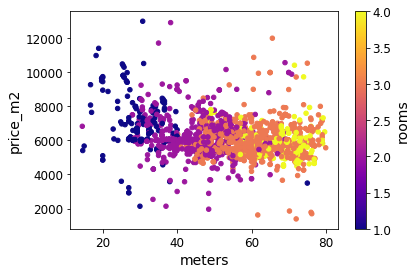

In [1445]:
df.plot(kind="scatter", x="meters", y="price_m2", alpha=1,
       c="rooms", cmap=plt.get_cmap("plasma"), colorbar=True,  sharex=False)

# Korelacja

In [1446]:
corr_df = df.corr()

In [1447]:
corr_df["price_m2"].sort_values(ascending=False)

price_m2      1.000000
rooms        -0.251341
meters_cat   -0.264691
meters       -0.270428
Name: price_m2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f613b3ccbe0>,
      dtype=object)

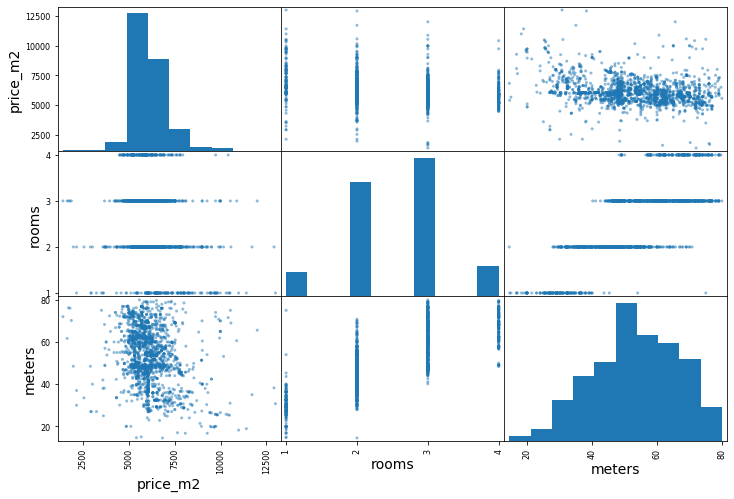

In [1448]:
from pandas.plotting import scatter_matrix

attributes = ["price_m2", "rooms", "meters"]
scatter_matrix(df[attributes], figsize=(12, 8))

# Kombinacje atrybutów

In [1449]:
df['meters_by_rooms'] = df['meters'] / df['rooms']
df['rooms_by_meter'] = df['rooms'] / df['meters']

In [1450]:
corr_df = df.corr()
corr_df["price_m2"].sort_values(ascending=False)

price_m2           1.000000
meters_by_rooms    0.081231
rooms_by_meter    -0.054333
rooms             -0.251341
meters_cat        -0.264691
meters            -0.270428
Name: price_m2, dtype: float64

# Przygotowanie danych pod algorytmy

In [1451]:
df = strat_train_set.drop("price_m2", axis=1)
df_labels = strat_train_set["price_m2"].copy()

# Atrybuty kategorialne dla tekstu

In [1459]:
from sklearn.preprocessing import OneHotEncoder

In [1460]:
dealer_cat = df['dealer']

In [1461]:
dealer_cat_encoded, dealer_categories = dealer_cat.factorize()
dealer_cat_encoded[:10]

array([ 0,  1,  2,  3, -1,  4,  5, -1,  4,  0])

In [1462]:
dealer_categories

Index(['3KLUCZEs.c.', 'MetrohouseLublin', 'Ofertaprywatna', 'LOGOINVEST',
       'ElżbietaLiberdaLexPerfectaKancelariaRadcyPrawnegoiBiuroNieruchomości',
       'StrefaM', 'BIGCITYBROKER', 'VISUMNIERUCHOMOŚCI', 'HERMESHOUSE',
       'WMNieruchomości', 'EMPTY', 'ŻagielDomSp.zo.o.',
       'HvileParkSp.zo.o.S.K.', 'FRANCZEWSKANieruchomościs.c.',
       'SzymanekNieruchomościSp.zo.o.', 'BiuroNieruchomościKWADRAT',
       'BESTHOUSENieruchomości', 'CLIVUSNieruchomości',
       'NieruchomościLalakPropertiesSpzo.o.SKA', 'LdomNieruchomości', 'Arena',
       'HomeBrokerS.A.', 'VBInvest', 'PółnocNieruchomościFranczyza',
       'Alfahouse', 'LubelskieMieszkania', 'GreenHouseNieruchomości', 'Lokum',
       '4tepiętro', 'InvestorNieruchomościFranchise',
       'WGNBiuroNieruchomościLublin', 'NieruchomościVERA', 'Inwe',
       'OnestoBroker', 'LogoInvest', 'PrestigeBroker',
       'Login-HouseNieruchomości', 'OMEGAHOUSELublin', 'HomePartnerSp.zo.o.',
       'geoDOMNieruchomości', 'HOME-TRADER', 'Fre

In [1466]:
encoder = OneHotEncoder(categories='auto')
dealer_cat_1hot = encoder.fit_transform(dealer_cat_encoded.reshape(-1,1))
dealer_cat_1hot

<1694x82 sparse matrix of type '<class 'numpy.float64'>'
	with 1694 stored elements in Compressed Sparse Row format>

In [1467]:
dealer_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1464]:
district_cat = df['district']

In [1456]:
district_cat_encoded, district_categories = district_cat.factorize()
district_cat_encoded[:10]

array([ 0,  1,  2,  3, -1,  4,  2, -1,  4,  0])

In [1457]:
district_categories

Index(['Felin', 'Dziesiąta', 'lubelskie', 'Konstantynów', 'Czuby', 'Botanik',
       'LSM', 'Wrotków', 'Szerokie', 'Sławin', 'Kalinowszczyzna',
       'Śródmieście', 'Czechów', 'Bazylianówka', 'Ponikwoda', 'Kośminek',
       'Węglinek', 'Centrum', 'Zana', 'Dolny', 'Górny', 'Sławinek',
       'Bronowice', 'Tatary', 'Wieniawa', 'Warszawska', 'Miasto', 'Węglin',
       'Konopnickiej', 'Poręba', 'Czwartek', 'Jezuickie', 'Zadębie',
       'Abramowice'],
      dtype='object')

In [1468]:
encoder = OneHotEncoder(categories='auto')
district_cat_1hot = encoder.fit_transform(district_cat_encoded.reshape(-1,1))
district_cat_1hot

<1694x35 sparse matrix of type '<class 'numpy.float64'>'
	with 1694 stored elements in Compressed Sparse Row format>

In [1469]:
district_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])